In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree

In [2]:
cdata=pd.read_csv("https://raw.githubusercontent.com/sfarhan79/datasets/main/python%20datasets/csv/company%20data.csv")
cdata.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


In [4]:
cdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    object 
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    object 
 10  US           400 non-null    object 
dtypes: float64(1), int64(7), object(3)
memory usage: 34.5+ KB


In [5]:
cdata.shape

(400, 11)

In [37]:
sns.pairplot(data=cdata,hue="ShelveLoc")

Output hidden; open in https://colab.research.google.com to view.

In [6]:
cdata1=pd.get_dummies(cdata,columns=["Urban","US"],drop_first=True)

In [8]:
cdata1.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban_Yes,US_Yes
0,9.50,138,73,11,276,120,Bad,42,17,1,1
1,11.22,111,48,16,260,83,Good,65,10,1,1
2,10.06,113,35,10,269,80,Medium,59,12,1,1
3,7.40,117,100,4,466,97,Medium,55,14,1,1
4,4.15,141,64,3,340,128,Bad,38,13,1,0


In [9]:
cdata1["ShelveLoc"]=cdata1["ShelveLoc"].map({"Good":1,"Medium":2,"Bad":3})
X=cdata1.iloc[:,0:6]
Y=cdata1["ShelveLoc"]

In [10]:
cdata1["ShelveLoc"].value_counts()

2    219
3     96
1     85
Name: ShelveLoc, dtype: int64

In [11]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=35)

In [12]:
#Decision Tree Classification using ENTROPY criteria.
cdata_entropy=DecisionTreeClassifier(criterion="entropy",max_depth=3)
cdata_entropy.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

[Text(0.5, 0.875, 'x[0] <= 6.165\nentropy = 1.409\nsamples = 320\nvalue = [67, 184, 69]'),
 Text(0.25, 0.625, 'x[2] <= 57.5\nentropy = 1.052\nsamples = 108\nvalue = [1, 61, 46]'),
 Text(0.125, 0.375, 'x[5] <= 95.5\nentropy = 0.843\nsamples = 48\nvalue = [0, 35, 13]'),
 Text(0.0625, 0.125, 'entropy = 0.0\nsamples = 3\nvalue = [0, 0, 3]'),
 Text(0.1875, 0.125, 'entropy = 0.764\nsamples = 45\nvalue = [0, 35, 10]'),
 Text(0.375, 0.375, 'x[5] <= 140.5\nentropy = 1.096\nsamples = 60\nvalue = [1, 26, 33]'),
 Text(0.3125, 0.125, 'entropy = 0.946\nsamples = 44\nvalue = [0, 16, 28]'),
 Text(0.4375, 0.125, 'entropy = 1.198\nsamples = 16\nvalue = [1, 10, 5]'),
 Text(0.75, 0.625, 'x[0] <= 10.49\nentropy = 1.327\nsamples = 212\nvalue = [66, 123, 23]'),
 Text(0.625, 0.375, 'x[5] <= 107.5\nentropy = 1.251\nsamples = 168\nvalue = [35, 111, 22]'),
 Text(0.5625, 0.125, 'entropy = 0.999\nsamples = 61\nvalue = [2, 44, 15]'),
 Text(0.6875, 0.125, 'entropy = 1.204\nsamples = 107\nvalue = [33, 67, 7]'),
 Text

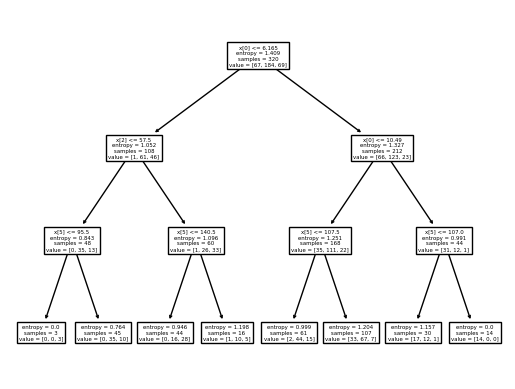

In [15]:
from sklearn import tree
tree.plot_tree(cdata_entropy)

In [16]:
X.columns

Index(['Sales', 'CompPrice', 'Income', 'Advertising', 'Population', 'Price'], dtype='object')

[Text(0.5, 0.875, 'Sales <= 6.165\nentropy = 1.409\nsamples = 320\nvalue = [67, 184, 69]\nclass = 2'),
 Text(0.25, 0.625, 'Income <= 57.5\nentropy = 1.052\nsamples = 108\nvalue = [1, 61, 46]\nclass = 2'),
 Text(0.125, 0.375, 'Price <= 95.5\nentropy = 0.843\nsamples = 48\nvalue = [0, 35, 13]\nclass = 2'),
 Text(0.0625, 0.125, 'entropy = 0.0\nsamples = 3\nvalue = [0, 0, 3]\nclass = 3'),
 Text(0.1875, 0.125, 'entropy = 0.764\nsamples = 45\nvalue = [0, 35, 10]\nclass = 2'),
 Text(0.375, 0.375, 'Price <= 140.5\nentropy = 1.096\nsamples = 60\nvalue = [1, 26, 33]\nclass = 3'),
 Text(0.3125, 0.125, 'entropy = 0.946\nsamples = 44\nvalue = [0, 16, 28]\nclass = 3'),
 Text(0.4375, 0.125, 'entropy = 1.198\nsamples = 16\nvalue = [1, 10, 5]\nclass = 2'),
 Text(0.75, 0.625, 'Sales <= 10.49\nentropy = 1.327\nsamples = 212\nvalue = [66, 123, 23]\nclass = 2'),
 Text(0.625, 0.375, 'Price <= 107.5\nentropy = 1.251\nsamples = 168\nvalue = [35, 111, 22]\nclass = 2'),
 Text(0.5625, 0.125, 'entropy = 0.999\nsa

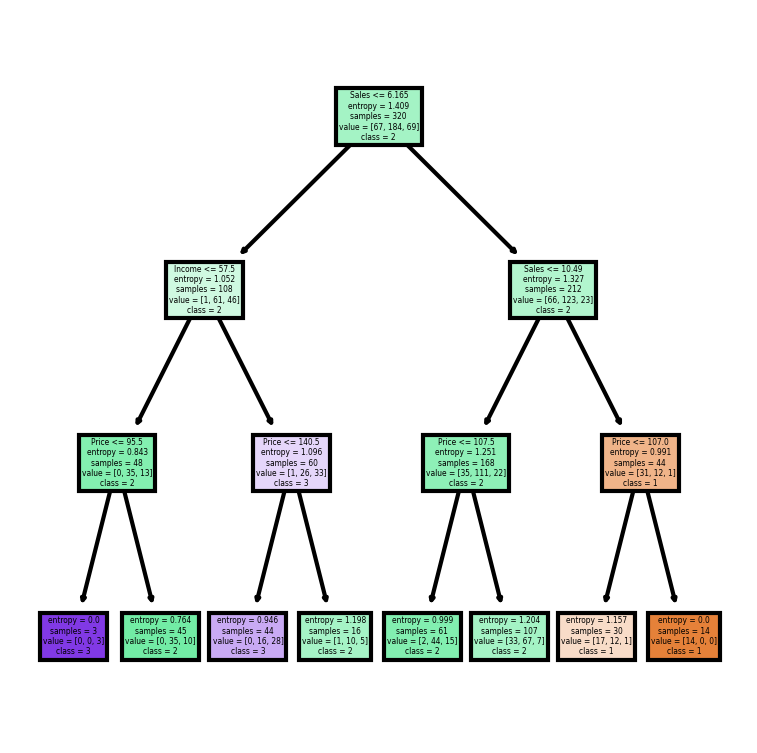

In [21]:
fn=['Sales', 'CompPrice', 'Income', 'Advertising', 'Population', 'Price']
cn=["1","2","3"]
fig,axes=plt.subplots(nrows=1,ncols=1,figsize=(3,3),dpi=300)
tree.plot_tree(cdata_entropy,feature_names=fn,class_names=cn,filled=True)

In [23]:
pred=cdata_entropy.predict(x_test)
pred

array([2, 2, 3, 1, 2, 2, 3, 2, 1, 2, 2, 2, 2, 2, 2, 2, 3, 2, 1, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 1, 2, 3, 2, 2, 3, 2, 2, 3, 3,
       2, 2, 2, 2, 2, 1, 1, 2, 1, 2, 1, 2, 2, 1, 2, 1, 1, 2, 3, 1, 1, 3,
       2, 3, 2, 3, 2, 1, 2, 2, 1, 2, 2, 2, 2, 1])

In [24]:
pd.crosstab(y_test,pred)

col_0,1,2,3
ShelveLoc,,,
1,12,6,0
2,3,28,4
3,2,18,7


In [25]:
#Accuracy
np.mean(pred==y_test)

0.5875

In [33]:
#Decision Tree Classification using GINI criteria.
cdata_gini=DecisionTreeClassifier(criterion="gini",max_depth=3)
cdata_gini.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=3)

In [31]:
gpred=cdata_gini.predict(x_test)
gpred

array([2, 3, 3, 1, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 3, 2,
       2, 2, 2, 2, 2, 2, 1, 2, 2, 3, 2, 2, 2, 2, 3, 2, 2, 3, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 1, 2, 1, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 1, 3,
       2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 1])

In [32]:
#Accuracy
np.mean(gpred==y_test)

0.5875

In [38]:
#Decision Tree Regression
from sklearn.tree import DecisionTreeRegressor
array=cdata1.values
X=array[:,0:3]
Y=array[:,3]
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.33,random_state=40)

In [39]:
cdata_regression=DecisionTreeRegressor()
cdata_regression.fit(x_train,y_train)

DecisionTreeRegressor()

In [40]:
cdata_regression.score(x_test,y_test)

-0.528667278982518

**Inference: We can choose either of the Decision Tree algorithms.**